# Population and Murder Rates

In [1]:
import pandas as pd

df_state = pd.read_csv('../input/state.csv')
df_state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [2]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
State           50 non-null object
Population      50 non-null int64
Murder.Rate     50 non-null float64
Abbreviation    50 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
df_state['Population'].mean()

6162876.3

In [4]:
df_state['Population'].median()

4436369.5

In [5]:
import scipy as sp
from scipy import stats

sp.stats.trim_mean(df_state['Population'], 0.1)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:2867: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


4783697.125

In [6]:
import numpy as np

np.average(df_state['Murder.Rate'], weights=df_state['Population'])

4.445833981123393

In [7]:
df_state['Population'].std()

6848235.347401142

In [19]:
q25 = df_state['Population'].quantile(0.25, interpolation='linear')
q75 = df_state['Population'].quantile(0.75, interpolation='linear')
IQR = q75 - q25
IQR

4847308.0

In [18]:
df_state['Population'].mad()

4450933.356000001

In [10]:
df_state['Population'].mad() * 1.4826

6598953.7936056005

In [11]:
df_state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

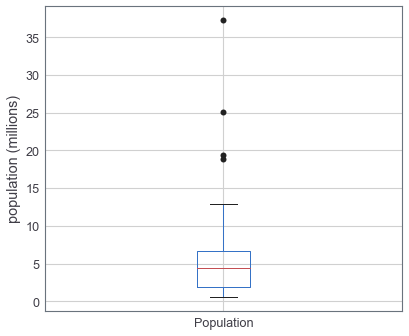

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

(df_state['Population'] / 1e6).plot.box(sym='k')
plt.ylabel('population (millions)')
plt.xlabel('')
plt.show()

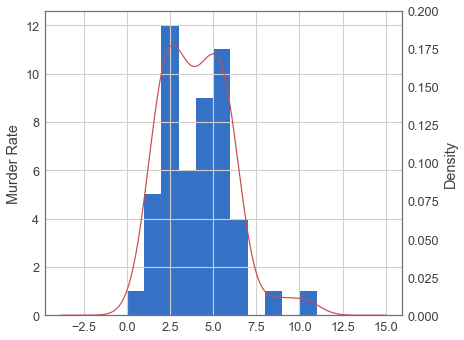

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_state['Murder.Rate'].hist(bins=range(0,12))
plt.ylabel('Murder Rate')
ax1 = ax.twinx()
df_state['Murder.Rate'].plot.kde(ax=ax1, color='r', grid=False)
plt.ylim([0,0.20])
plt.show()

# Delayed Flights

In [50]:
df_dfw = pd.read_csv('../input/dfw_airline.csv')
df_dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


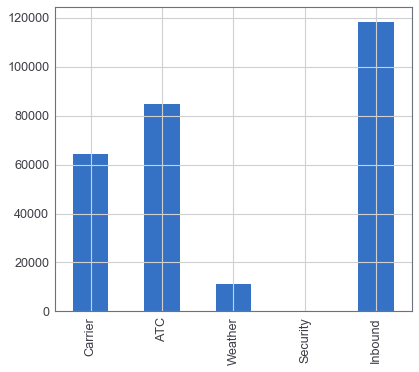

In [60]:
df_dfw.iloc[0].plot(kind='bar')

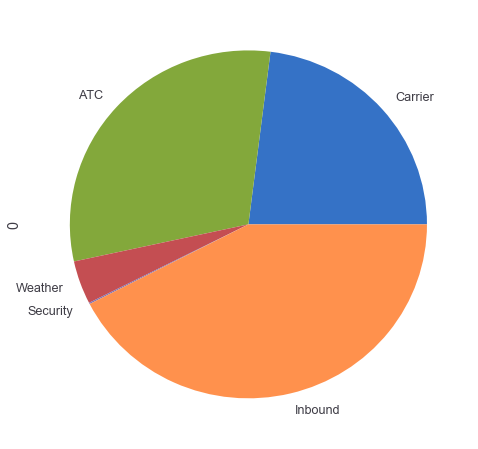

In [62]:
plt.figure(figsize=(8,8))
df_dfw.iloc[0].plot(kind='pie')

# SP 500

In [63]:
df_sp500 = pd.read_csv('../input/sp500_data.csv')
df_sp500.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [64]:
select_columns = ['T', 'CTL', 'FTR', 'VZ', 'LVLT']
df_sp500[select_columns].corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.405853,0.283279,0.617035,0.061545
CTL,0.405853,1.000000,0.377644,0.385752,0.054534
FTR,0.283279,0.377644,1.000000,0.289295,0.067313
VZ,0.617035,0.385752,0.289295,1.000000,0.045919
LVLT,0.061545,0.054534,0.067313,0.045919,1.000000


([<matplotlib.axis.YTick at 0x11dede978>,
 <a list of 5 Text yticklabel objects>)

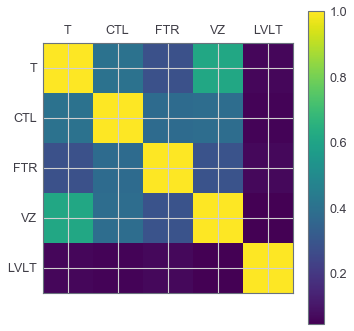

In [75]:
plt.matshow(df_sp500[select_columns].corr())
plt.colorbar()
plt.xticks(range(len(select_columns)), select_columns)
plt.yticks(range(len(select_columns)), select_columns)

Text(0,0.5,'VZ')

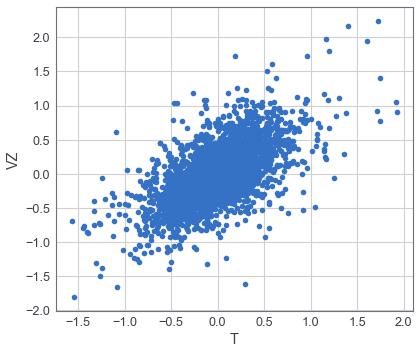

In [79]:
plt.plot(df_sp500["T"], df_sp500["VZ"], "bo")
plt.xlabel("T")
plt.ylabel("VZ")

# Tax-assessed Values

In [91]:
df_tax = pd.read_csv('../input/kc_tax.csv')
df_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [93]:
df_tax = df_tax[(df_tax['TaxAssessedValue'] < 750000) & (df_tax['SqFtTotLiving'] > 100) &
               (df_tax['SqFtTotLiving'] < 3500)]
df_tax = df_tax.reset_index(drop=True)
df_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,206000.0,1870,98002.0
1,303000.0,1530,98166.0
2,361000.0,2000,98108.0
3,459000.0,3150,98108.0
4,223000.0,1570,98032.0


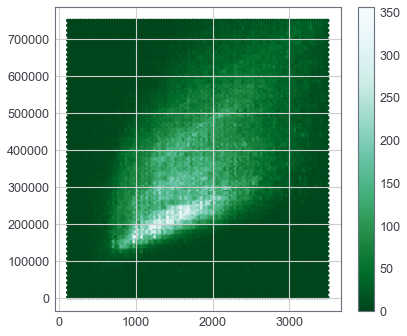

In [97]:
plt.hexbin(df_tax['SqFtTotLiving'], df_tax['TaxAssessedValue'], cmap=plt.cm.BuGn_r)
plt.colorbar()

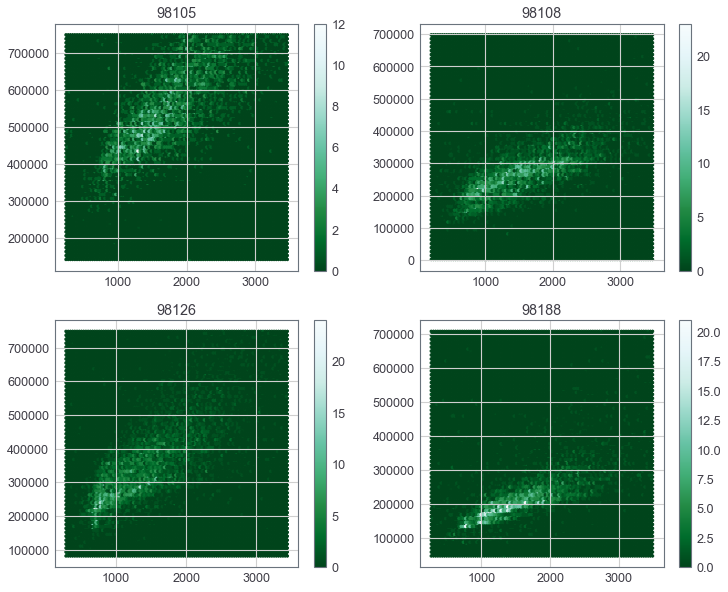

In [182]:
zipcode = [98105, 98108, 98126, 98188]
plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hexbin(df_tax['SqFtTotLiving'][df_tax['ZipCode']==zipcode[i]], 
               df_tax['TaxAssessedValue'][df_tax['ZipCode']==zipcode[i]], 
               cmap=plt.cm.BuGn_r)
    plt.title(zipcode[i])
    plt.colorbar()

# Lending Club

In [99]:
df_lc = pd.read_csv('../input/lc_loans.csv')
df_lc.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [100]:
pd.crosstab(df_lc['grade'], df_lc['status'])

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,1562,50051,20408,469
B,5302,93852,31160,2056
C,6023,88928,23147,2777
D,5007,53281,13681,2308
E,2842,24639,5949,1374
F,1526,8444,2328,606
G,409,1990,643,199


In [105]:
df_lc.groupby('grade').count()

,status
grade,
A,72490
B,132370
C,120875
D,74277
E,34804
F,12904
G,3241


In [123]:
tab = pd.crosstab(df_lc['grade'], df_lc['status'])
tab.sum(axis=1)

grade
A     72490
B    132370
C    120875
D     74277
E     34804
F     12904
G      3241
dtype: int64

In [121]:
tab.div(tab.sum(axis=1), axis=0)

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,0.021548,0.690454,0.281528,0.006470
B,0.040054,0.709013,0.235401,0.015532
C,0.049828,0.735702,0.191495,0.022974
D,0.067410,0.717328,0.184189,0.031073
E,0.081657,0.707936,0.170929,0.039478
F,0.118258,0.654371,0.180409,0.046962
G,0.126196,0.614008,0.198396,0.061401


# Airline Stats

In [157]:
df_airstat = pd.read_csv('../input/airline_stats.csv')
df_airstat.dropna(inplace=True)
df_airstat.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [158]:
airline = df_airstat['airline'].unique()
airline

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [159]:
df_airstat['pct_delay'] = df_airstat.sum(axis=1, numeric_only=True)
df_airstat.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline,pct_delay
0,8.153226,1.971774,0.762097,American,10.887097
1,5.959924,3.706107,1.585878,American,11.251908
2,7.157270,2.706231,2.026706,American,11.890208
3,12.100000,11.033333,0.000000,American,23.133333
4,7.333333,3.365591,1.774194,American,12.473118


([<matplotlib.axis.XTick at 0x12b2f1630>,
 <a list of 6 Text xticklabel objects>)

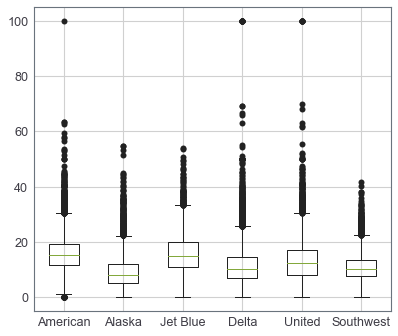

In [175]:
allbox = [df_airstat['pct_delay'][(df_airstat['airline']) == x].tolist() 
          for x in airline]
plt.boxplot(allbox, sym='k')
plt.xticks(range(1, len(airline)+1), airline)
#for i in range(len(allbox)):
#    print(np.median(allbox[i]))

([<matplotlib.axis.XTick at 0x12d8e9f60>,
 <a list of 6 Text xticklabel objects>)

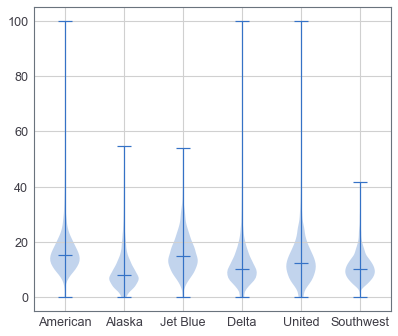

In [179]:
plt.violinplot(allbox, showmedians=True)
plt.xticks(range(1, len(airline)+1), airline)